# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `Clustering`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q1.ipynb`.

In [7]:
import nltk
nltk.download('punkt')    
# if u r facing issues while importing nltk, please uncomment above line and run
import re
import numpy as np
import sklearn
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer


     |████████████████████████████████| 79 kB 3.5 MB/s 
     |████████████████████████████████| 3.5 MB 11.2 MB/s 
     |████████████████████████████████| 1.2 MB 42.1 MB/s 
     |████████████████████████████████| 67 kB 5.5 MB/s 
     |████████████████████████████████| 895 kB 43.6 MB/s 
     |████████████████████████████████| 596 kB 44.9 MB/s 
     |████████████████████████████████| 6.8 MB 30.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=a15dd6c7518e15c475513247b631b27039064966d260b1ac05f7e8b5c2670d7f
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Dataset



*   Try to explore the dataset and first understand
*   Steps while processing the dataset:

1.   Load the dataset
>> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: train and test. Here, we only use train part of the dataset as we don't need any training.

2.   pre-processing of the dataset
>>   A set of basic pre-processing steps are given below, if you can do it better, it is appreciable
3.   Trying to obtain the embeddings for the text. 
>> Here, we used bert model to obtain the embeddings, if you want to use anyother sentence/word embeddings (ELMo,universal sentence encoder, or other bert models) you can use it, but not mandatorily change it)

PS: You need not completely understand how bert works. If you are interested, few links will be mentioned below.

In [3]:
# loading of dataset

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

# print(list(newsgroups_train))
#['data', 'filenames', 'target_names', 'target', 'DESCR']
# all we require for our task is data and target. 
#target_names describe the different groups present (which are 20) all over the dataset

# print(list(newsgroups_train.target_names))

In [4]:
type(newsgroups_train)
# print(newsgroups_train.DESCR)

sklearn.utils.Bunch

In [8]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
#preprocessing of sentences and the article

def remove_punct(text):
  text = re.sub('[^a-zA-Z0-9 ]+','', text)
  return text

def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

def remove_tag(text):   
  text=' '.join(text)
  html_pattern = re.compile('<.*?>')
  return html_pattern.sub(r'', text)

def pre_process_sentence(sentence):
  sentence = sentence.lower()
  sentence = remove_punct(remove_urls(sentence))
  return sentence

def pre_process_article(article):
  article = str(article).replace("\n", '')
  article = sent_tokenize(article)
  sentences = []
  for each in article:
    if len(each.split(":")) > 1:
      continue
    sentences.append(pre_process_sentence(each))
  return sentences



In [10]:

def get_review_embedding(article):
  sentences = pre_process_article(article)

  #here review(input) has to be a list of sentences
  #use suitable embeddings to get an embedding for the whole review
  #usage of sentence embeddings is recommended

  sentence_embeddings = bert_model.encode(sentences)

  # take average of all sentence embeddings to obtain a review embedding 
  review_embedding = np.zeros(768)
  for each in sentence_embeddings:
    review_embedding = np.add(np.array(each), review_embedding)

  return review_embedding




In [11]:
X_train=[]
for article in newsgroups_train.data:
  X_train.append(get_review_embedding(article))


In [12]:
Y_train = newsgroups_train.target

In [13]:
len(newsgroups_train.target_names)

20

In [16]:
# data visualization 

# Try to visualise the points from all the domains and try to visualise them 
# hint: you can use PCA 

import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
X=pca.fit_transform(X_train)


In [17]:
def visualise_clusters(X,classes):
    #Getting unique labels
  
  u_labels = np.unique(classes)
  
  #plotting the results:
  
  for i in u_labels:
      plt.scatter(X[classes == i , 0] , X[classes == i , 1] , label = i)
  plt.legend()
  plt.show()

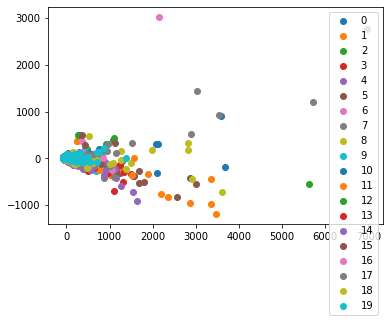

In [18]:
visualise_clusters(X,Y_train)

# K_Means Algorithm


In [19]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=4).fit(X)
kmeans.labels_


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

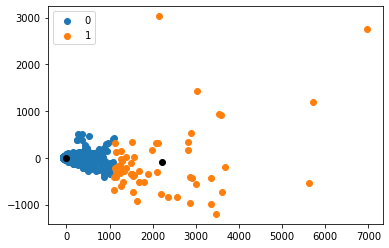

In [20]:
u_labels = np.unique(kmeans.labels_)

#plotting the results:

for i in u_labels:
    plt.scatter(X[kmeans.labels_ == i , 0] , X[kmeans.labels_ == i , 1] , label = i)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')
plt.legend()
plt.show()

# Elbow method



*   Try to understand how elbow method works
*   Plot the graph between average distance and the number of clusters
*   Use elbow method to find the optimal number of clusters, 







In [21]:
from scipy.spatial.distance import cdist
def elbow_method(X,no_clusters):
  wcss=[]
  distortions=[]
  # no_clusters=[2,3,4]
  for k in no_clusters:
    kmeans = KMeans(n_clusters=k, random_state=4).fit(X)
    wcss.append(kmeans.inertia_)
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
  return wcss,distortions


In [22]:
no_clusters = range(2,12,1)
wcss,distortions = elbow_method(np.array(X_train),no_clusters)


Text(0, 0.5, 'Within cluster sum of squares')

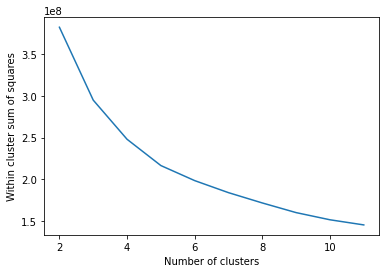

In [37]:
plt.plot(no_clusters,wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')

Text(0, 0.5, 'Distortions')

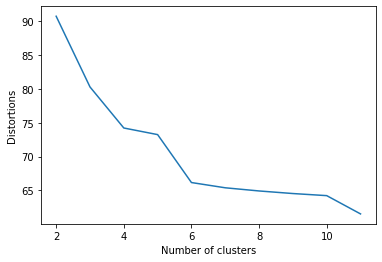

In [38]:
plt.plot(no_clusters,distortions)
plt.xlabel('Number of clusters')
plt.ylabel('Average Distance')

## Inference
From the graph, we can see that the variation distortion after 6 is not very large. Therefore, I decide the number of clusters as 6

# Silhouette Method


*   Compute silhouette score varying the K number of clusters

*   Plot the graph between silhoutte score and number of clusters 

*   Find the optimal number of clusters using silhouette method




> Report the optimal number of clusters you obtained from above two methods (elbow and silhouette)




In [39]:
from sklearn.metrics import silhouette_score

In [40]:
def silhouette(no_clusters):
  sil_scores=[]
  for k in no_clusters:
    clusterer = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train)
    sil_scores.append(silhouette_score(X_train,cluster_labels))
  return sil_scores

In [41]:
no_clusters = range(2,15,1)
sil_scores = silhouette(no_clusters)


Text(0, 0.5, 'Silhouette score')

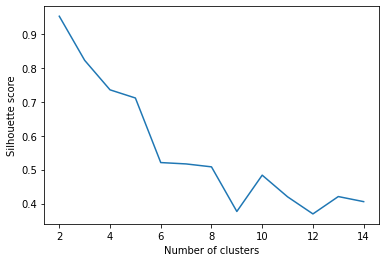

In [42]:
plt.plot(no_clusters,sil_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

## Inference
From the graph, we can see that the Silhoutter is higher at 2. From Silhoutter score, the optimal number of clusters is 2

# Agglomerative clustering

In [25]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import AgglomerativeClustering

def Agglomerative(visuals,no_clusters=2):
  clustering = AgglomerativeClustering(n_clusters = no_clusters,compute_distances = True).fit(visuals)
  return clustering


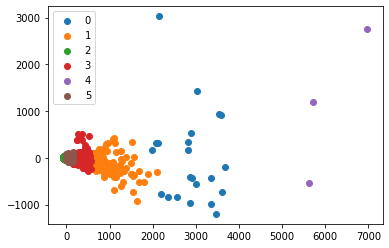

In [26]:
#code for visualisation of clusters

Agglomerativemodel = Agglomerative(X , no_clusters=6)
Agglomerativelabels = Agglomerativemodel.labels_
visualise_clusters(X,Agglomerativelabels)


# Dendogram


*   Try to understand the difference between agglomerative clustering and hierarchical clustering
*   Plot dendograms for both kinds of clustering
*   Find the optimal number of clusters with the help of Dendogram



## Difference betweeen Agglomerative clustering and Divisive clustering
### Agglomerative clustering
- Agglomerative clustering is a bottom-up approach
- Every data point is considered as cluster. The nearest datapoints are combined to form a single cluster.
- The above process is repeated until a single cluster is formed.

### Divisive clustering
- Divisive clustering is a top-bottom approach
- All the data points are considered as single cluster. The data points are further divided into multiple clusters using Flat Clustering technique.
- The above process is repeated until a specified number of clusters are formed or until every datapoint becomes a cluster

In [45]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    
    
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    

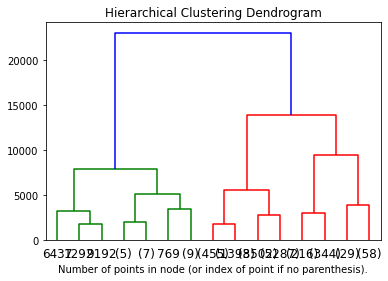

In [46]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram

plot_dendrogram(Agglomerativemodel, truncate_mode="level", p=3)

plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

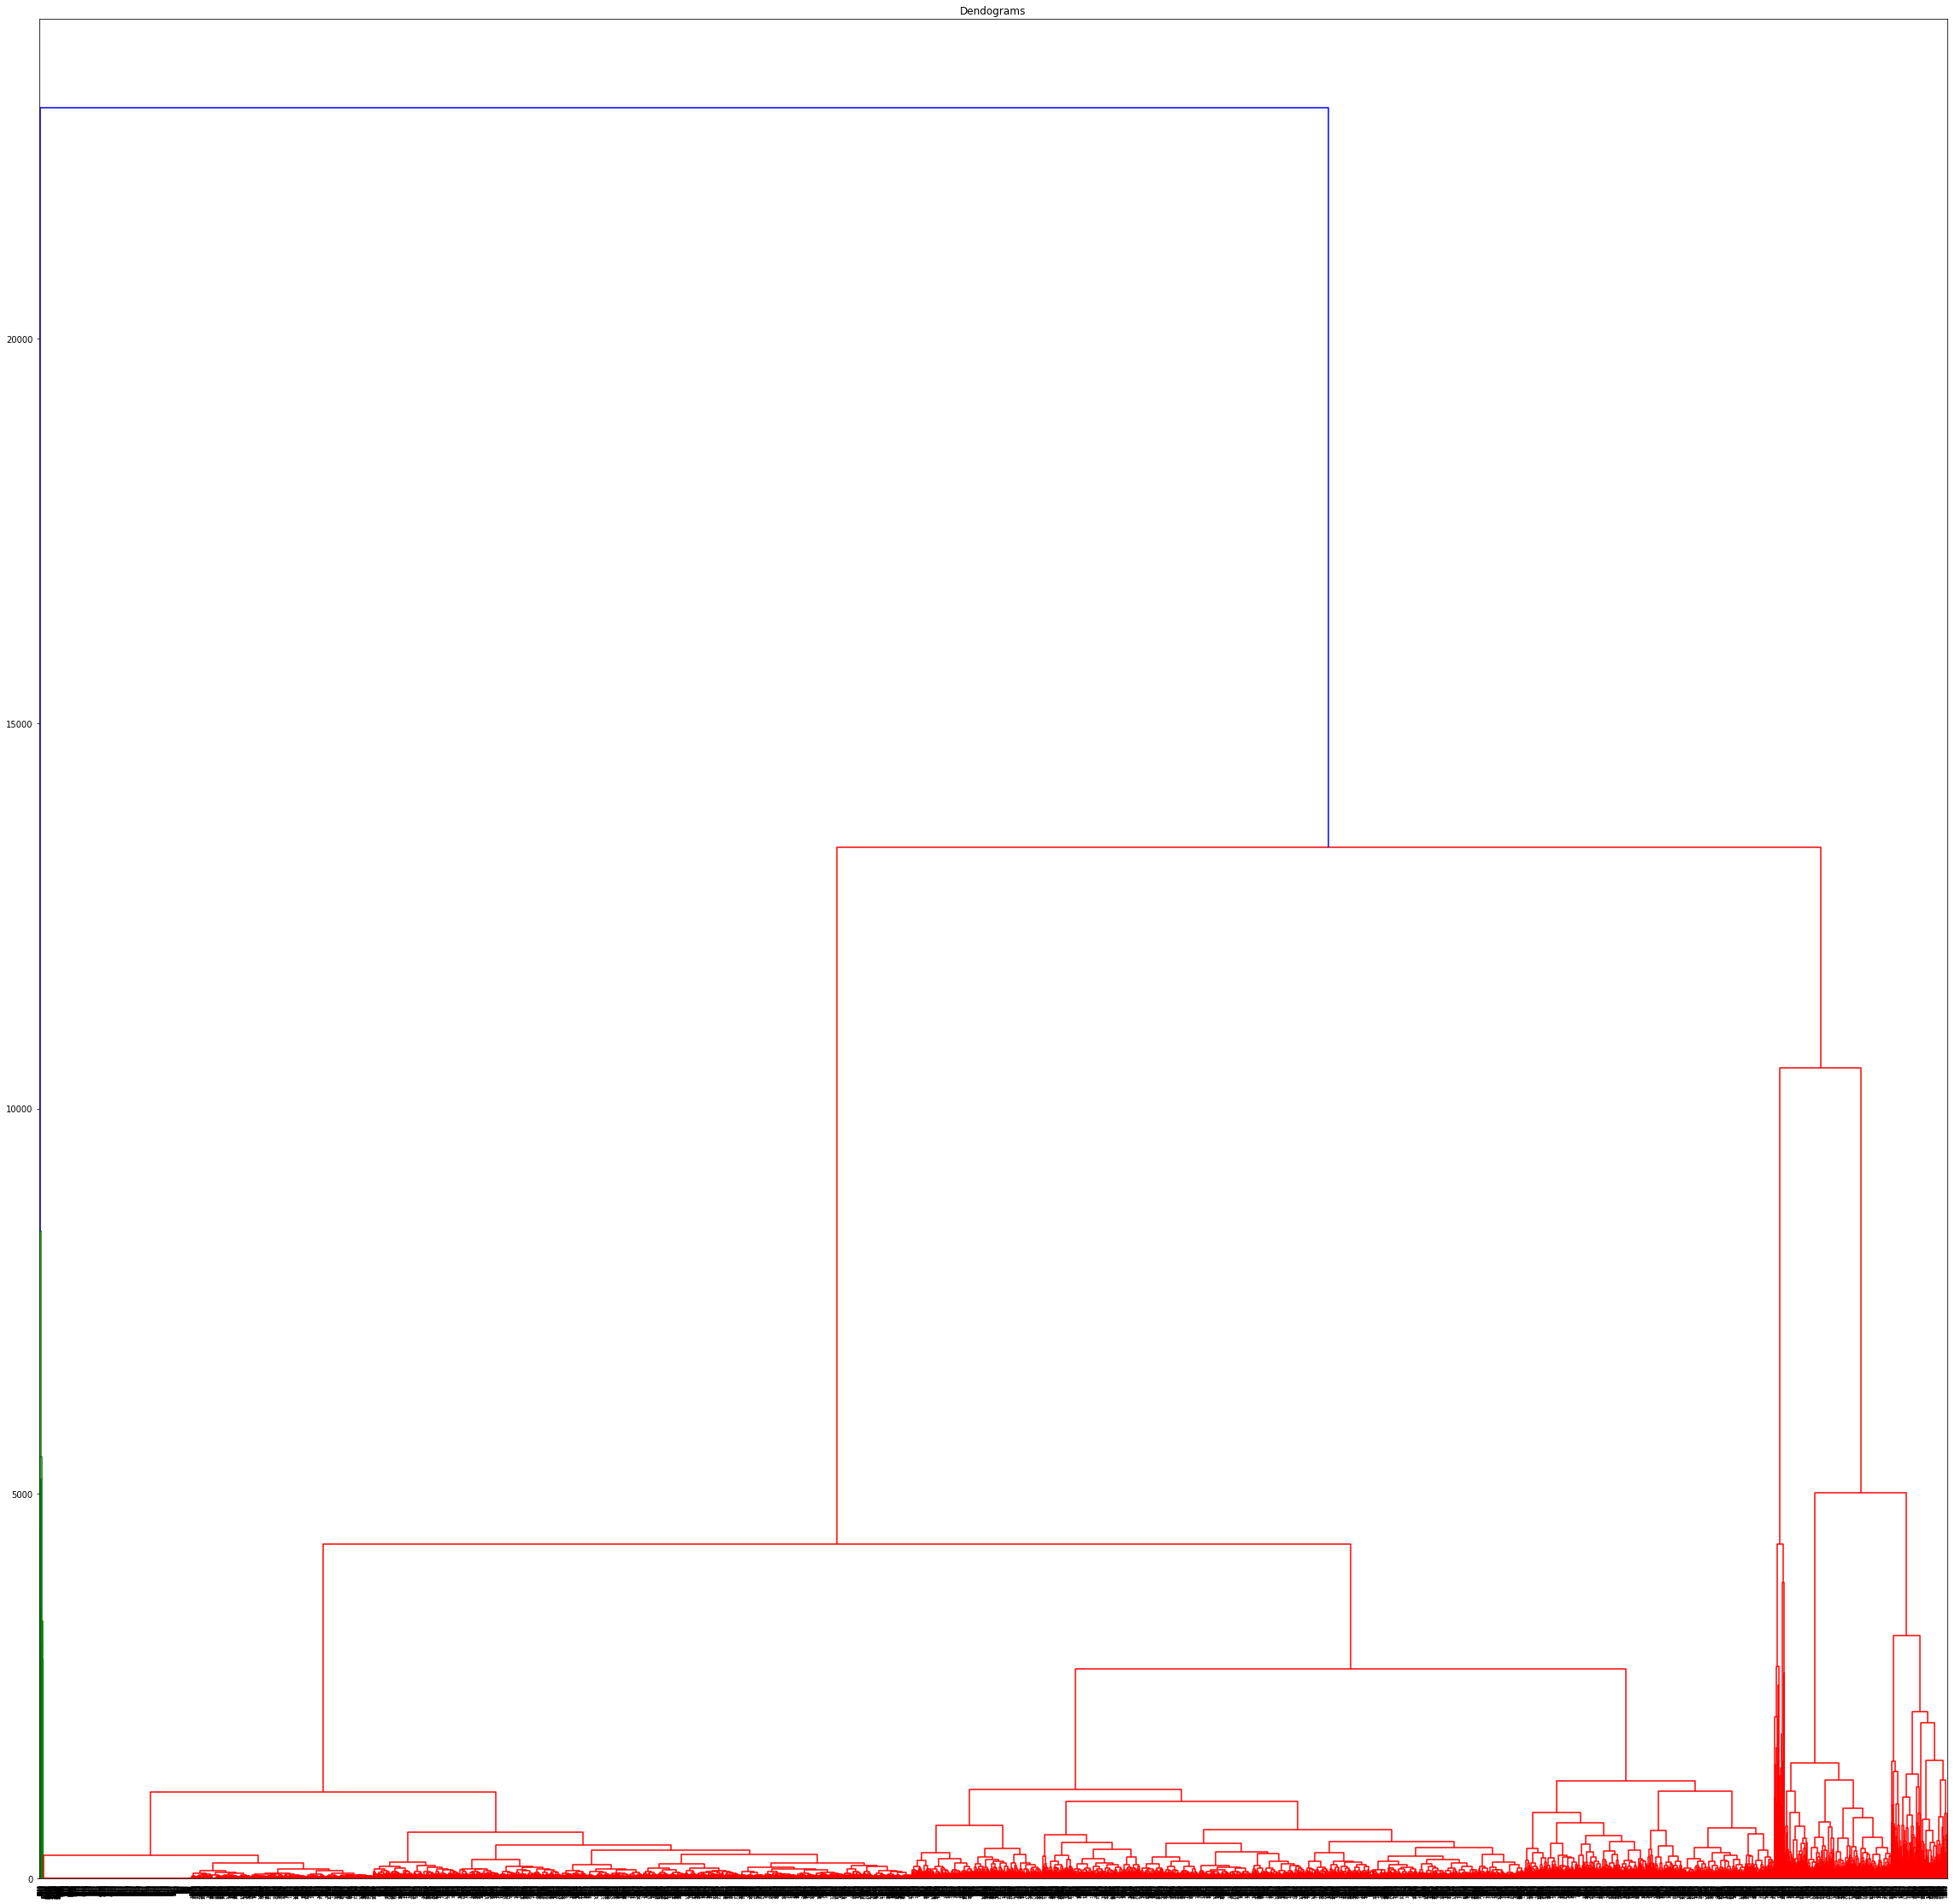

In [23]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(40, 40))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(X_train, method='ward'))

In [27]:
cluster = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', compute_full_tree=True, distance_threshold=14000)

cluster.fit_predict(np.array(X_train))

print(f"Number of clusters = {1+np.amax(cluster.labels_)}")

Number of clusters = 2


# useful links to understand BERT

*  https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270#:~:text=How%20BERT%20works,%2Dwords)%20in%20a%20text.&text=As%20opposed%20to%20directional%20models,sequence%20of%20words%20at%20once.


